# Proyek Analisis Data: Air Quality

*   Nama: Dehan Ammaralda Handiana
*   Email: dehanseal@gmail.com
*   Id Dicoding: ammaralda





## Pertanyaan Bisnis

- Apakah intensitas aktifitas penduduk pada waktu tertentu dapat mempengarhi perubahan suhu?
- Apakah kualitas udara sekarang dipengaruhi oleh perilaku penduduk yang menyebabkan asap karbon monoksida?
- Seberapa nyaman kualitas udara di Dongsi pada saat musim panas?


## Menyiapkan semua library yang dibutuhkan


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [17]:
main_dongsi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dicoding/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv')


### Assessing Data

In [18]:
main_dongsi.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [19]:
main_dongsi.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


- Karena terdapat 4 musim di China, cukup ambil salah satu musim agar distribusi data temperaturenya tidak menjadi salah
- Ambil musim panas (Summer) pada bulan Juni hingga Agustus dengan asumsi musim ini adalah salah satu musim yang penduduknya aktif bekerja dari biasanya

In [20]:
#Musim panas China (Juni sampai Agustus)
summer_dongsi = main_dongsi.loc[(main_dongsi["month"].isin([6,7,8]))]
summer_dongsi


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
2208,2209,2013,6,1,0,118.0,129.0,41.0,40.0,1000.0,115.0,21.6,999.7,16.1,0.0,ENE,0.7,Dongsi
2209,2210,2013,6,1,1,120.0,128.0,35.0,49.0,1100.0,98.0,20.7,999.9,16.9,0.0,ESE,0.5,Dongsi
2210,2211,2013,6,1,2,116.0,128.0,35.0,46.0,1000.0,62.0,20.0,1000.0,17.2,0.0,E,0.9,Dongsi
2211,2212,2013,6,1,3,126.0,138.0,27.0,87.0,NaN,NaN,20.2,1000.5,17.0,0.0,NE,1.2,Dongsi
2212,2213,2013,6,1,4,117.0,121.0,23.0,88.0,900.0,46.0,19.8,1001.6,16.6,0.0,NE,1.1,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30715,30716,2016,8,31,19,10.0,45.0,2.0,26.0,300.0,71.0,30.6,990.4,-4.5,0.0,N,3.6,Dongsi
30716,30717,2016,8,31,20,10.0,40.0,2.0,25.0,300.0,71.0,29.8,991.4,-5.1,0.0,N,5.1,Dongsi
30717,30718,2016,8,31,21,11.0,70.0,2.0,18.0,200.0,76.0,29.2,991.7,-4.3,0.0,NNW,3.0,Dongsi
30718,30719,2016,8,31,22,7.0,27.0,2.0,25.0,300.0,62.0,28.6,991.3,-3.6,0.0,NW,2.5,Dongsi


### Cleaning Data

In [21]:
summer_dongsi.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       330
PM10        254
SO2         356
NO2         332
CO         1715
O3          278
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd            3
WSPM          0
station       0
dtype: int64

In [22]:
summer_dongsi = summer_dongsi.dropna()
summer_dongsi.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

- Untuk mendapatkan data 24 jam, diperlukan grouping agar terlihat patternnya.
- Data yang diambil dari 2013 hingga 2017
- Dikarenakan data yang diperlukan ialah 24 jam, maka dapat menggunakan "mean" / rata-rata dari seluruh data yang dikelompokan bedasarkan jam


### Grouping by Hour dan hapus kolom yang tidak diperlukan

In [23]:
# Grouping data untuk mendapatkan data 24 jam
# Menghitung rerata pada kolom yang mengandung integer
dongsi_24 = summer_dongsi.groupby(["hour"], as_index=False).mean(numeric_only = True).drop(['No', 'year', "month", "day"], axis=1)
dongsi_24

,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,0,70.365188,86.368601,6.587031,49.494881,1097.607509,76.569966,24.231741,1002.148464,18.288396,0.150853,1.356314
1,1,71.225256,85.522184,6.686007,49.921502,1112.283276,64.931741,23.722867,1002.077474,18.304778,0.087713,1.245051
2,2,71.764505,85.146758,6.996587,50.116041,1093.843003,54.235495,23.149488,1002.021160,18.318771,0.196246,1.259727
3,3,70.390559,82.696154,6.425874,50.342308,982.160839,44.257343,22.703497,1002.043706,18.198601,0.243007,1.164685
4,4,70.006873,81.611684,6.628866,49.982818,942.951890,46.319588,22.349141,1002.153265,18.174227,0.273883,1.159107
5,5,70.375427,80.133106,6.481229,48.965870,1033.781570,38.406143,22.190785,1002.407167,18.278840,0.116382,1.154949
6,6,69.897260,80.342466,6.417808,48.743151,1046.910959,36.212329,22.776712,1002.678425,18.367466,0.082877,1.239041
7,7,69.726027,81.702055,6.969178,49.263699,1059.239726,36.989726,23.945890,1002.927397,18.231849,0.041096,1.505822
8,8,71.489726,82.746575,7.938356,50.534247,1086.986301,42.099315,25.152055,1003.095205,18.038356,0.078082,1.585616
9,9,71.044828,81.706897,8.441379,47.772414,1089.655172,53.674138,26.304483,1003.046897,17.822414,0.111724,1.774138


## Visualization & Explanatory Analysis

### Apakah intensitas aktifitas penduduk pada waktu tertentu dapat mempengarhi perubahan suhu?

<Axes: xlabel='hour', ylabel='TEMP'>

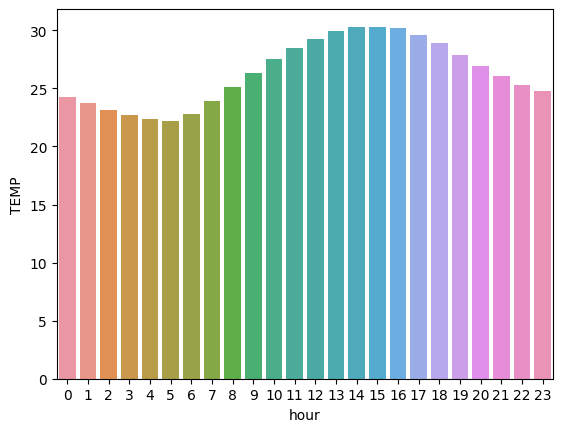

In [24]:
#Distribusi Temperature dalam 24 jam
sns.barplot(data=dongsi_24, x = "hour", y = "TEMP")

- Terlihat dari data distribusi suhu, terdapat lonjakan suhu dari pukul 7 pagi hingga 2 siang. Hal ini bisa terjadi karena penduduk Dongsi mulai aktif beraktifitas dan menggunakan kendaraan pada pukul itu

In [25]:
min = int(dongsi_24["TEMP"].min())
max = int(dongsi_24["TEMP"].max())
print(f"Suhu tertinggi dalam sehari (Musim Panas): {max} Celcius")
print(f"Suhu terendah dalam sehari (Musim Panas): {min} Celcius")

Suhu tertinggi dalam sehari (Musim Panas): 30 Celcius
Suhu terendah dalam sehari (Musim Panas): 22 Celcius


### Apakah kualitas udara sekarang dipengaruhi oleh perilaku penduduk yang menyebabkan asap karbon monoksida?

Polusi udara sangat berkaitan erat dengan asap kendaraan. Cek korelasi antara PM2.5 sebagai parameter polusi udara dan Karbon Monoksida (CO) sebagai asap udara yang dihasilkan oleh kendaraan

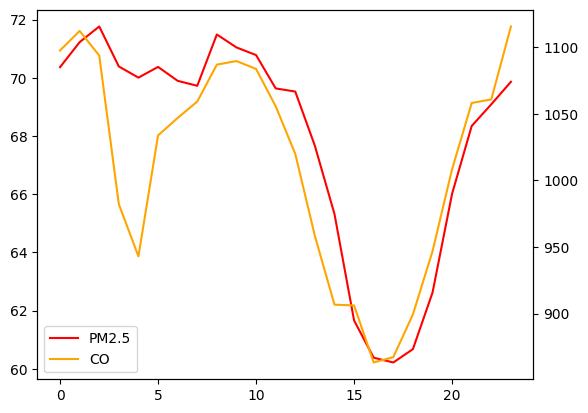

In [26]:
#Korelasi antara PM2.5 dan Karbon Monoksida

ax1 = plt.subplot()
l1, = ax1.plot(dongsi_24["PM2.5"], color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(dongsi_24["CO"], color='orange')
plt.legend([l1, l2], ["PM2.5", "CO"])
plt.show()

In [27]:
pollution_corr = dongsi_24['PM2.5'].corr(dongsi_24['CO'])
print(f"Korelasi antara PM2.5 dan Karbon Monoksida (CO): {pollution_corr}")

Korelasi antara PM2.5 dan Karbon Monoksida (CO): 0.8674517155020174


Terlihat dengan score 0.867 yang berarti adanya korelasi yang cukup kuat dari produksi karbon monoksida (CO) dengan kualitas udara (PM2.5)

### Seberapa nyaman kualitas udara di Dongsi pada saat musim panas?

menghitung suhu dan titik embun untuk menjaga kelembapan relatif pada tingkat yang nyaman. Jarak udara dari saturasi dapat dihitung dengan menggunakan selisih suhu (T) dan titik embun (DP).

Kelembapan yang lebih tinggi artinya perbedaan suhu-titik embun yang lebih kecil, sedangkan kelembapan yang lebih rendah yang berarti perbedaan yang lebih besar.

Sebagai referensi, idealnya menggunakan 5 derajat celcius sebagai selisih dari suhu dan titik embun

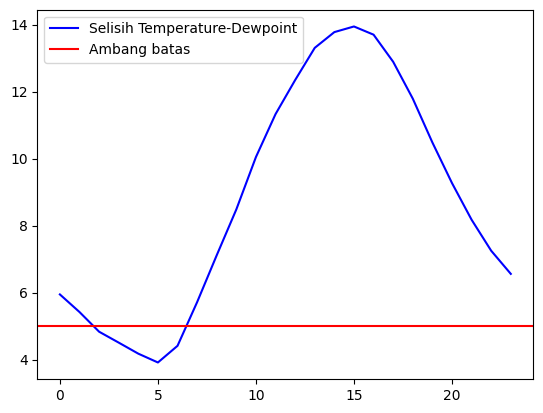

In [28]:

temp_dew = dongsi_24["TEMP"] - dongsi_24["DEWP"]
temp_dew = pd.DataFrame(temp_dew, columns=['temp-dew'])

l1, =plt.plot(temp_dew["temp-dew"], label = "Selisih Temperature-Dewpoint", color='blue')
plt.axhline(y = 5, label = "Ambang batas", color = 'r', linestyle = '-')
plt.legend()
plt.show()

Terlihat bahwa hanya dari pukul 3 pagi hingga 7 pagi titik optimal dicapai. selebihnya naik drastis hingga 14 derajat.
Hal ini dikarenakan adanya faktor aktifitas penduduk dan juga musim yang sedang dirasakan (Musim Panas) yang dimana cenderung lebih kering ketimbang musim lainnya

## Conclusion

Dapat disimpulkan bahwa:
- Aktifitas penduduk Dongsi pada musim panas cukup banyak, ini dapat dilihat dari naiknya trend Karbon Monoksida yang muncul dari asap kendaraan atau pabrik
- Banyaknya aktifitas ini juga menyebabkan kenaikan suhu dimulai dari pukul 7 pagi hingga 2 siang. Hal ini pun juga berkaitan dengan jam aktifitas penduduk yang bekerja ataupun melakukan aktifitas lain
- Penduduk dongsi mendapatkan kelembapan yang kurang ideal, ini dapat dilihat dari selisih antara titik embun dengan temperatur selama 24 jam. Penduduk Dongsi hanya mendapatkan nilai optimum dari pukul 3 pagi hingga 7 pagi. Ini juga berhubungan dengan jam aktifitas warga Dongsi yang menurun pada pukul tersebut